In [14]:
from pathlib import Path
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

results_dir = Path("results")
results_err_Dir = Path("results_error")
results_err_Dir.mkdir(parents=True, exist_ok=True)

ref_path = Path("tfim_4x4_suscept_ref.csv")

In [5]:
seeds = [49, 42, 44, 50, 46, 45, 51, 47, 43, 48]

def newest_file_for_seed(seed: int) -> Path:
    # matches: ...seed42_YYYYMMDD_HHMMSS.csv
    pattern = f"*seed{seed}_????????_??????.csv"
    files = list(results_dir.glob(pattern))
    if not files:
        raise FileNotFoundError(f"No result file found for seed {seed} in {results_dir}")
    # lexicographic max works because timestamp is sortable
    return max(files, key=lambda p: p.name)

all_results = []
for s in seeds:
    p = newest_file_for_seed(s)
    df = pd.read_csv(p)  # expects columns: h, chi_F
    all_results.append(
        {
            "seed": s,
            "h_eval": df["h"].to_numpy(),
            "chi_values": df["chi_F"].to_numpy(),
            "file": p.name,
        }
    )

# optional: show what got loaded
[(r["seed"], r["file"]) for r in all_results]

[(49, 'tfim_4x4_suscept_rbm_seed49_20260122_182529.csv'),
 (42, 'tfim_4x4_suscept_rbm_seed42_20260122_182529.csv'),
 (44, 'tfim_4x4_suscept_rbm_seed44_20260122_182529.csv'),
 (50, 'tfim_4x4_suscept_rbm_seed50_20260122_182528.csv'),
 (46, 'tfim_4x4_suscept_rbm_seed46_20260122_182528.csv'),
 (45, 'tfim_4x4_suscept_rbm_seed45_20260122_182528.csv'),
 (51, 'tfim_4x4_suscept_rbm_seed51_20260122_182529.csv'),
 (47, 'tfim_4x4_suscept_rbm_seed47_20260122_182529.csv'),
 (43, 'tfim_4x4_suscept_rbm_seed43_20260122_182528.csv'),
 (48, 'tfim_4x4_suscept_rbm_seed48_20260122_182529.csv')]

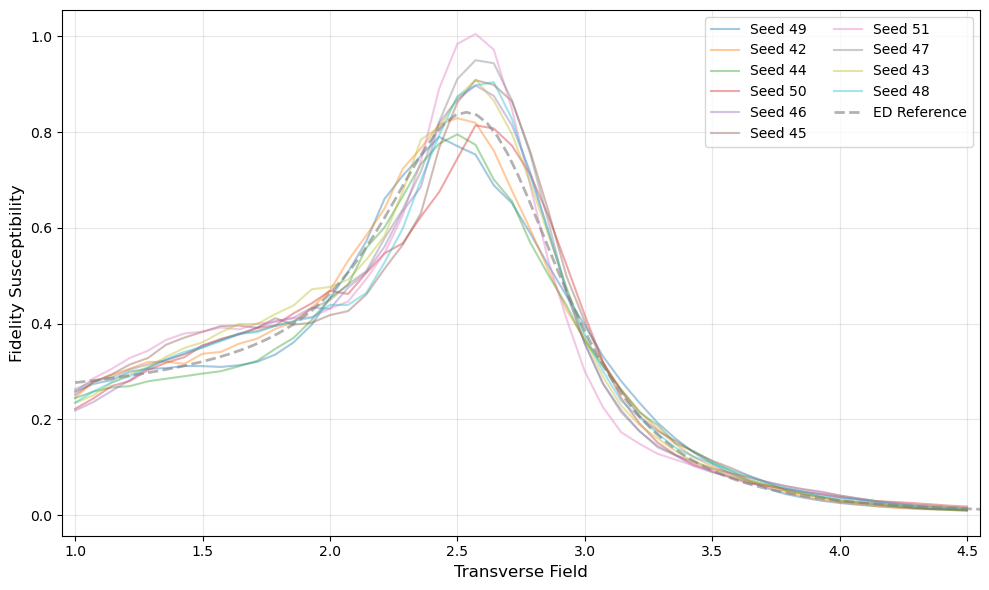

In [6]:
# Cell 3 - plot
plt.figure(figsize=(10, 6), dpi=100)

ref_df = pd.read_csv(ref_path)

for r in all_results:
    plt.plot(r["h_eval"], r["chi_values"], "-", alpha=0.4, label=f"Seed {r['seed']}")

plt.plot(ref_df["h"], ref_df["chi_F"], "--", color="gray", linewidth=2, alpha=0.6, label="ED Reference")

plt.xlabel("Transverse Field", fontsize=12)
plt.ylabel("Fidelity Susceptibility", fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(1.00 - 0.05, 4.5 + 0.05)
plt.legend(loc="upper right", fontsize=10, ncol=2)
plt.tight_layout()
plt.show()

In [10]:
all_chi = np.stack([r["chi_values"] for r in all_results[:10]], axis=0)
mean_chi = np.median(all_chi, axis=0)
error_chi = np.std(all_chi, axis=0)
h_eval = all_results[0]["h_eval"] if all_results else np.linspace(1.0, 4.5, 50)

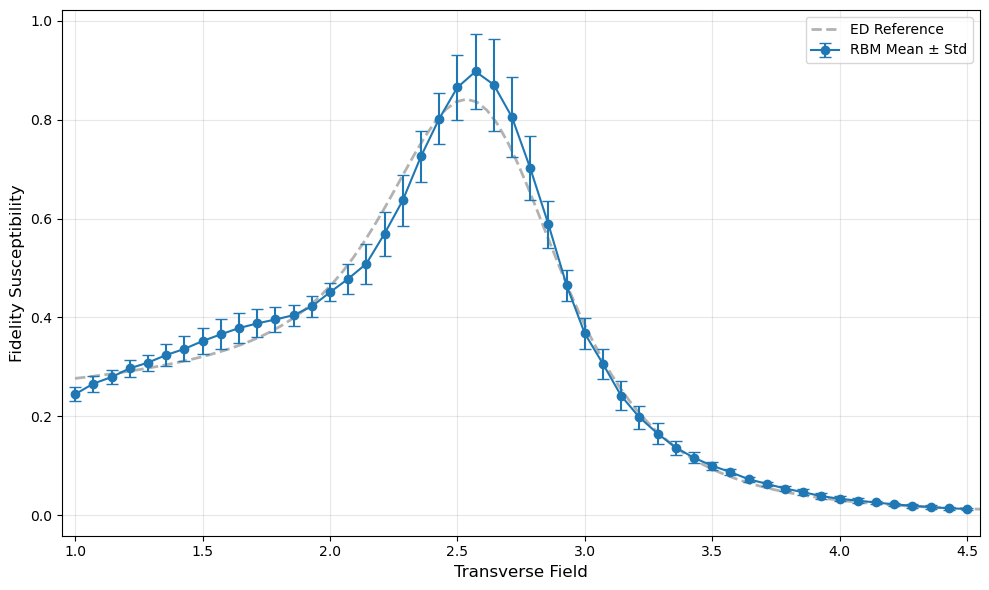

In [11]:
plt.figure(figsize=(10, 6), dpi=100)

ref_df = pd.read_csv(ref_path)

plt.plot(ref_df["h"], ref_df["chi_F"], "--", color="gray", linewidth=2, alpha=0.6, label="ED Reference")
plt.errorbar(h_eval, mean_chi, yerr=error_chi, fmt="o-", capsize=4, label="RBM Mean ± Std")

plt.xlabel("Transverse Field", fontsize=12)
plt.ylabel("Fidelity Susceptibility", fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(1.00 - 0.05, 4.5 + 0.05)
plt.legend(loc="upper right", fontsize=10)
plt.tight_layout()
plt.show()

In [16]:
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
results = np.column_stack((h_eval, mean_chi, error_chi))

file_name = f"tfim_4x4_suscept_rbm_err_{timestamp}.csv"
save_path = results_err_Dir / file_name

header = "h,chi_F,chi_F_err"
np.savetxt(save_path, results, delimiter=",", header=header, comments="")
print(f"Data saved to: {save_path}")

Data saved to: results_error/tfim_4x4_suscept_rbm_err_20260122_232231.csv
